In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# change directory to /content/drive/MyDrive/plotting/
%load_ext autoreload
%autoreload 2

%cd /content/drive/MyDrive/plotting/
!pip install -e .

/content/drive/MyDrive/plotting
Obtaining file:///content/drive/MyDrive/plotting
  Preparing metadata (setup.py) ... done
  Attempting uninstall: paperfigs
    Found existing installation: paperfigs 0.1.0
    Uninstalling paperfigs-0.1.0:
      Successfully uninstalled paperfigs-0.1.0
  Running setup.py develop for paperfigs


In [3]:
import paperfigs
import importlib
importlib.reload(paperfigs)

<module 'paperfigs' (<_frozen_importlib_external._NamespaceLoader object at 0x7b603bd3be50>)>

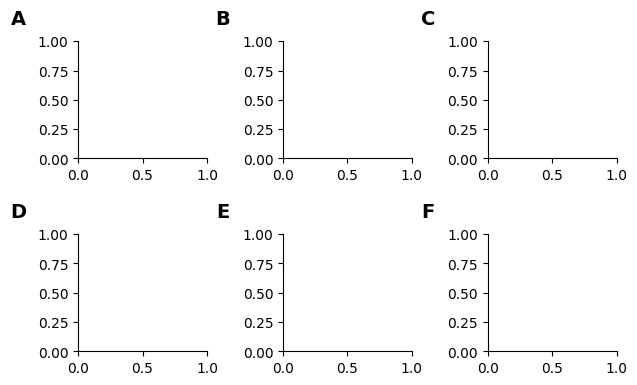

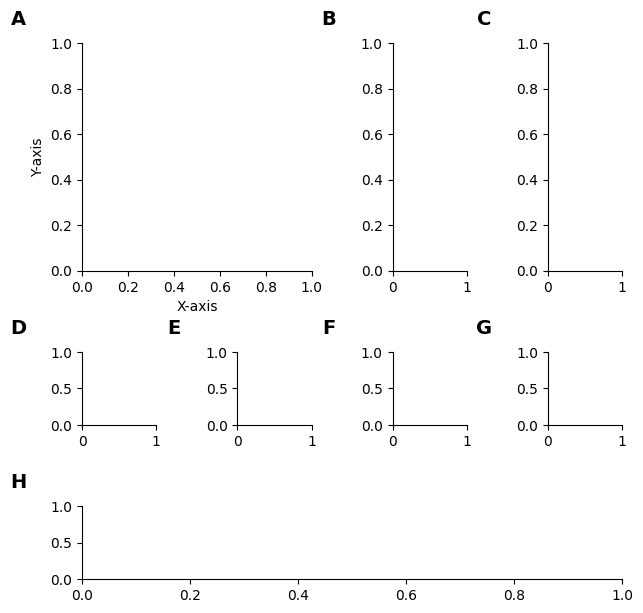

In [4]:
# tests for figure.py
import paperfigs.figure as pf
import matplotlib.pyplot as plt

# test1 - nrows, ncols
ax_dict = pf.init_figure(nrows=2, ncols=3, figsize=(8, 5), white_space = 0.15)
plt.show()

# test2 - different nrows, ncols
col_widths = [[2, 1, 1], [1, 1, 1, 1], [1]]
row_widths = [2, 1, 1]
ax_dict = pf.init_figure(col_widths=col_widths, row_widths=row_widths, figsize=(8, 8) , white_space = 0.1)
ax_dict['A'].set_xlabel("X-axis")
ax_dict['A'].set_ylabel("Y-axis")
plt.show()

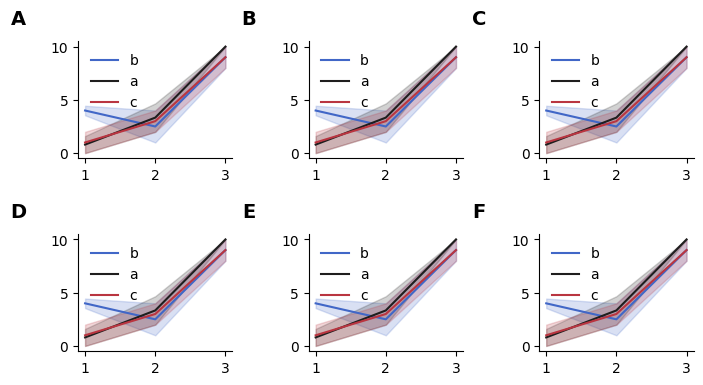

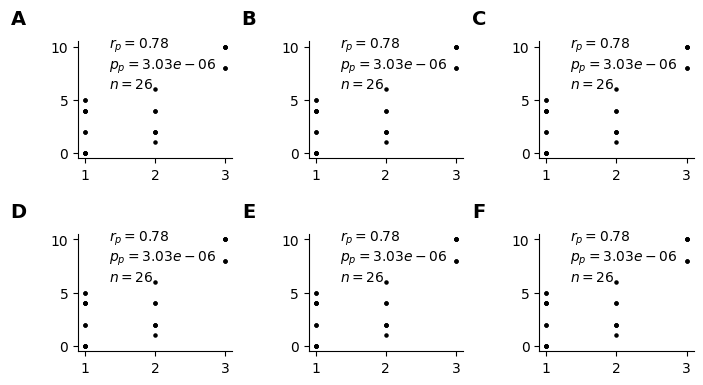

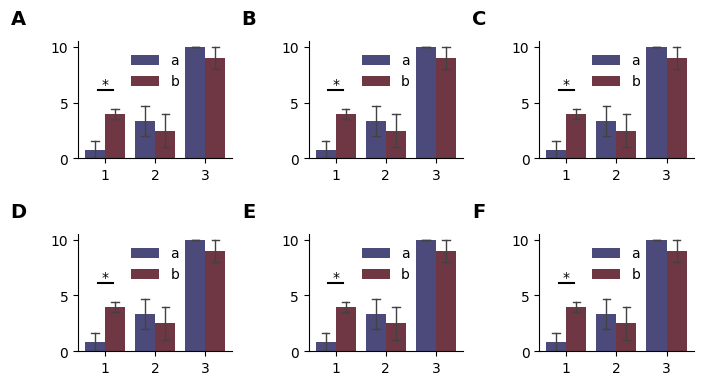

In [5]:
import numpy as np

from paperfigs.styles import apply_over_axes
from paperfigs.plot import plot_line, plot_scatter, plot_bar

# tests for plot.py
# test line plot
x = [3, 1, 1,1, 1, 1,1,1,1, 1,2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3,2,2, 1, 1]
y = [10, 0, 0,0,0,  4,4,4,4, 2,2, 5, 5, 2, 1,6, 4, 10, 8, 10, 8, 10, 2, 4, 2, 0]
hue = ["b", "a","a", "a", "a", "a", "b", "b", "b", "b", "a", "b", "b", "a", "b", "a", "b", "a", "b", "a", "c", "c", "c", "c", "c", "c"]

ax_dict = pf.init_figure(nrows=2, ncols=3, figsize=(9, 5), white_space = 0.15)
func = lambda ax: plot_line(x, y, ax, hue=hue)
apply_over_axes(func, ax_dict)
plt.show()

# test scatter plot
ax_dict = pf.init_figure(nrows=2, ncols=3, figsize=(9, 5), white_space = 0.15)
func = lambda ax: plot_scatter(x, y, ax)
apply_over_axes(func, ax_dict)
plt.show()

# test bar plot
ax_dict = pf.init_figure(nrows=2, ncols=3, figsize=(9, 5), white_space = 0.15)
idx = np.logical_or(np.array(hue) == "a", np.array(hue) == "b")
func = lambda ax: plot_bar(x=np.array(x)[idx],y=np.array(y)[idx],ax=ax,hue=np.array(hue)[idx])
apply_over_axes(func, ax_dict)
plt.show()